# **TASK 1- PREDICTION USING SUPERVISED MACHINE LEARNING**

**AUTHOR - Prathamesh Channe**

**GRIP at The Sparks Foundation**

**PROBLEM STATEMENT : PREDICT THE PERCENTAGE OF THE STUDENT BASED ON NO. OF STUDY HOURS, FROM THE GIVEN DATASET.**

**We have to Predict the Percentage of the student if the student study for 9.25 hrs/day.** 

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
#loading the data
url = "http://bit.ly/w-data"
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value in the dataset.

**Graphical representation of data** 

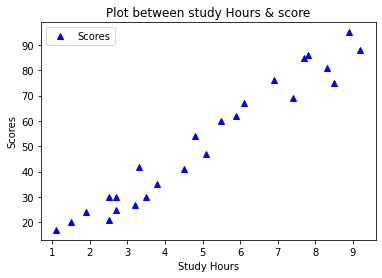

In [6]:
df.plot(x='Hours', y='Scores', style= '^', color='blue')
plt.title('Plot between study Hours & score')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

In [7]:
#statistical info about the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Positive correlation between study hours and scores.

**Cleaning the data**

As we checked above that there is no null values in the data , so data is ready to train the model.

**Training & Testing the Model**

In [9]:
# data Preparation

x = (df['Hours'].values).reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y = df['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [11]:
#spliting the data in test and training sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 0)
print('done with spliting')

done with spliting


In [12]:
#training the data

from sklearn.linear_model import LinearRegression
regn = LinearRegression()
regn.fit(x_train, y_train)
print('Done with training')

Done with training


In [13]:
print('Intercept value is:' ,regn.intercept_)
print('Linear cofficient is :', regn.coef_)

Intercept value is: 2.018160041434662
Linear cofficient is : [9.91065648]


**Plotting the regression line**

In [14]:
Regline= regn.coef_*x+regn.intercept_


**Visualising the trained model**

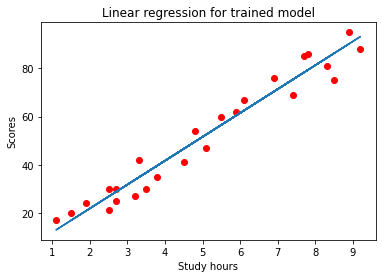

In [15]:
plt.scatter(x,y, color= 'red')
plt.title('Linear regression for trained model')
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.plot(x, Regline)
plt.show()

**PREDICTING VALUES**

In [16]:
# To predict the scores of testing data
y_pred= regn.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing with actual dataset**

In [17]:
#Actual vs predicted

df1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


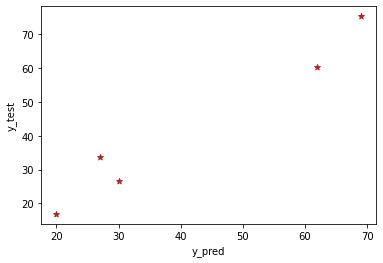

In [18]:
plt.scatter(y_test, y_pred, marker= '*' , color='brown')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

**What will be predicted score of student who studies for 9.25 hours/day ?**

In [19]:
hours= 9.25 # lets check for this value
pred_score = regn.predict([[hours]])
print('Number of hours =',hours)
print('Predicted Scores =',pred_score[0].round(2))

Number of hours = 9.25
Predicted Scores = 93.69


**Evaluating the model**

In [20]:
from sklearn import metrics
print('Mean absoluate error=', metrics.mean_absolute_error(y_test, y_pred))

Mean absoluate error= 4.183859899002982


**Conclusion:**

The student who will study for 9.25 hrs will score 94% marks approx.